<a href="https://colab.research.google.com/github/bbarthougatica/ChmInf/blob/Toxic_data/MLP%20model%20for%20Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cheminformatics & drug design - Project**

We chose two Data Sets from the *MoleculeNet*.
We aim to study toxicity and lipophilicity properties and use classification and regression tasks with them.
Both datasets are split into training, validation and test subsets following a 80/10/10 ratio and is recommended to do RANDOM splitting.
# 1st Data Set: **Lipophilicity**

*   Lipophilicity is an important feature of drug molecules that affects both membrane permeability and solubility. The lipophilicity dataset, curated from ChEMBL database, provides experimental results of octanol/water distribution coefficient (logD at pH 7.4) of 4200 compounds. This property influences how a drug is absorbed, distributed, metabolised, and excreted in the body (ADME properties).
*   Task type: Regression
*   Nº Tasks: 1
*   Recommended regression metric: Root-Mean-Square Error
*   Nº Compounds: 4200
*   Prediction target: Lipophilicity


# 2nd Data Set: **SIDER**

* Database of marketed drugs and adverse drug reactions (ADR), grouped into 27 system organ classes.
*   Task type: Classification
*   Nº Tasks: 27
*   Recommended classification metric: Area Under Curve of Receiver Operating Characteristics
*   Nº Compounds: 1427
*   Prediction target: Adverce Drug Reaction


In [30]:
# Install all libraries
!pip install numpy scipy matplotlib scikit-learn pandas rdkit xgboost deepchem mordred pycm

import pandas as pd
import deepchem as dc
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole



Now we upload our selected Data Bases.

## 2. Classification algorithms

#**2.1) Get DataBases**
In this case, "SIDER" for classification exercise. Per default, featurizer is ECFP, also known as circular fingerprints or as morgan generator

In [31]:
# Circular Fingerprints Featurizer (Morgan FP with size=2048, radius=8)
featurizer = dc.feat.CircularFingerprint(size=2048, radius=8)

# Load SIDER dataset, applying the custom featurizer during loading
tasks, datasets, transformers = dc.molnet.load_sider(featurizer=featurizer)

train_dataset, valid_dataset, test_dataset = datasets

print(f"SIDER Dataset load succesfully.")
print("Dataset:", "SIDER")
print("Number of tasks (side effect categories):", len(tasks))
print("Example task names:", tasks[:5])
print(f"Number of classification tasks: {len(tasks)}")

SIDER Dataset load succesfully.
Dataset: SIDER
Number of tasks (side effect categories): 27
Example task names: ['Hepatobiliary disorders', 'Metabolism and nutrition disorders', 'Product issues', 'Eye disorders', 'Investigations']
Number of classification tasks: 27


We can check all the 27 tasks related to side effects in this DataSet.

In [32]:
tasks

['Hepatobiliary disorders',
 'Metabolism and nutrition disorders',
 'Product issues',
 'Eye disorders',
 'Investigations',
 'Musculoskeletal and connective tissue disorders',
 'Gastrointestinal disorders',
 'Social circumstances',
 'Immune system disorders',
 'Reproductive system and breast disorders',
 'Neoplasms benign, malignant and unspecified (incl cysts and polyps)',
 'General disorders and administration site conditions',
 'Endocrine disorders',
 'Surgical and medical procedures',
 'Vascular disorders',
 'Blood and lymphatic system disorders',
 'Skin and subcutaneous tissue disorders',
 'Congenital, familial and genetic disorders',
 'Infections and infestations',
 'Respiratory, thoracic and mediastinal disorders',
 'Psychiatric disorders',
 'Renal and urinary disorders',
 'Pregnancy, puerperium and perinatal conditions',
 'Ear and labyrinth disorders',
 'Cardiac disorders',
 'Nervous system disorders',
 'Injury, poisoning and procedural complications']

In [33]:

# Convert to DataFrame
X_train = train_dataset.X #1024-bit molecular fingerprints
y_train = train_dataset.y #Side effect binary labels
ids_train = train_dataset.ids #SMILES

df = pd.DataFrame(y_train, columns=tasks)
df.insert(0, "SMILES", ids_train)

df.head()

,SMILES,Hepatobiliary disorders,Metabolism and nutrition disorders,Product issues,Eye disorders,Investigations,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Social circumstances,Immune system disorders,...,"Congenital, familial and genetic disorders",Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications"
0,C(CNCCNCCNCCN)N,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
1,Cl[Tl],0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,C[N+](C)(C)CC(CC(=O)O)O,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3,C(CC(=O)O)CN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C(CC(=O)O)C(=O)CN,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


In this project, our goal is to develop a machine learning model that predicts physiological side effects of drug molecules based on their chemical structure. Each molecule is represented by molecular descriptors derived from its SMILES notation, and the target output consists of 27 binary labels corresponding to physiological side effect categories. This represents a multi-label classification problem, where each compound can be associated with multiple side effects simultaneously.

In drug discovery, predicting adverse side effects before clinical testing can: Reduce the risk of toxicity in early drug candidates Help prioritize safer compounds Save significant time and cost in development So, our proposed model essentially acts as a computational toxicity screener, a decision-support tool for medicinal chemists.

From the preveius model we know that we had no invalid SMILES so we don't have to clean the data.

#**1.2) Featurizing**

We'll try two different molecular featurization strategies.

In the first case, we used circular fingerpints, which are binary.

For the second featurizer we chose **RDKdescriptors**. As said before, this descriptor compliments nicely since it allows us to add global molecular fingerprints, it includes physicochemical descriptors (molecular weight, logP, H-bond donors/acceptors, etc.), it's easier to interpret and lower dimensional than bit-based fingerprints, and often better for property prediction or toxicity-related endpoints

As a third, we chose **MACCSKeysFingerprint**.

### Circular Fingerprints
When we uploaded the Data we already featurized the DataSet with Circular Fingerprints, so now we change the variable names to use them an compare in the model. This featurizer will allow us compare the previous results from the Random Forest Classification model that also used this featurizer.

In [34]:
# Featurizing: Circular Fingerprints for SIDER

# The features generated by the CircularFingerprint featurizer during load are stored in .X
X_train_morgan = train_dataset.X

# The binary targets (27 side effects) are stored in .y
y_train_sider = train_dataset.y

# The SMILES strings are stored in .ids (needed for the other featurizers)
ids_train = train_dataset.ids

# Create a DataFrame for the Morgan FP features
morgan_fp_columns = [f'fp_{i}' for i in range(2048)]
df_morgan_sider_train = pd.DataFrame(X_train_morgan, columns=morgan_fp_columns)

# Assign the final variables used in the rest of the modeling
X_train = df_morgan_sider_train # Morgan FP (The first feature set)
y_train = y_train_sider         # Target Labels

### RDKit Descriptors
This featurizer will allow us compare the previous results from the Random Forest Classification model that also used this featurizer.

In [35]:
import numpy as np
# Featurizing: RDKit Descriptors for SIDER

rdkit_desc_featurizer = dc.feat.RDKitDescriptors()

# RDKit Descriptors using the SMILES strings
X_desc_sider_train = rdkit_desc_featurizer.featurize(ids_train.tolist())

# Handle NaN values: replace with 0
X_desc_sider_train[np.isnan(X_desc_sider_train)] = 0

# Get the descriptor names
descriptor_names = rdkit_desc_featurizer.descriptors

# Create the final DataFrame for this feature set
df_desc_sider_train = pd.DataFrame(X_desc_sider_train, columns=descriptor_names)

[19:45:23] WARNING: not removing hydrogen atom without neighbors
[19:45:23] WARNING: not removing hydrogen atom without neighbors
[19:45:23] WARNING: not removing hydrogen atom without neighbors
[19:45:23] WARNING: not removing hydrogen atom without neighbors
[19:45:23] WARNING: not removing hydrogen atom without neighbors
[19:45:23] WARNING: not removing hydrogen atom without neighbors
[19:45:23] WARNING: not removing hydrogen atom without neighbors
[19:45:23] WARNING: not removing hydrogen atom without neighbors
[19:45:23] WARNING: not removing hydrogen atom without neighbors
[19:45:23] WARNING: not removing hydrogen atom without neighbors
[19:45:23] WARNING: not removing hydrogen atom without neighbors
[19:45:23] WARNING: not removing hydrogen atom without neighbors
[19:45:25] WARNING: not removing hydrogen atom without neighbors
[19:45:25] WARNING: not removing hydrogen atom without neighbors
[19:45:25] WARNING: not removing hydrogen atom without neighbors
[19:45:25] WARNING: not r

### MACCSKeysFingerprint
Since we use Circular Fingerprints, we now want to counterbalance this with a more direct featurizer. That is why we chose MACCS Keys as a low-complexity representation (166 bits). If our model works well, we can know that the prediction is based on the fundamental chemical or structural rules that MACCS Keys can see.

In [36]:
# MACCS Keys Fingerprints
print("Featurizing: MACCS Keys Fingerprints for SIDER")

# Initialize the MACCS Keys Featurizer.
maccs_featurizer = dc.feat.MACCSKeysFingerprint()

# Featurize the SMILES
X_maccs_sider_train = maccs_featurizer.featurize(ids_train.tolist())

# Define maccs_size based on the featurizer's output shape
maccs_size = X_maccs_sider_train.shape[1]

# Create a DataFrame for the MACCS Keys
df_maccs_sider_train = pd.DataFrame(X_maccs_sider_train, columns=[f'maccs_{i}' for i in range(maccs_size)])

print(f"MACCS Keys Fingerprints dimensions for SIDER: {df_maccs_sider_train.shape}")

Featurizing: MACCS Keys Fingerprints for SIDER


[19:46:28] WARNING: not removing hydrogen atom without neighbors
[19:46:28] WARNING: not removing hydrogen atom without neighbors
[19:46:28] WARNING: not removing hydrogen atom without neighbors
[19:46:28] WARNING: not removing hydrogen atom without neighbors
[19:46:28] WARNING: not removing hydrogen atom without neighbors
[19:46:28] WARNING: not removing hydrogen atom without neighbors
[19:46:28] WARNING: not removing hydrogen atom without neighbors
[19:46:28] WARNING: not removing hydrogen atom without neighbors
[19:46:28] WARNING: not removing hydrogen atom without neighbors
[19:46:28] WARNING: not removing hydrogen atom without neighbors
[19:46:29] WARNING: not removing hydrogen atom without neighbors
[19:46:29] WARNING: not removing hydrogen atom without neighbors
[19:46:29] WARNING: not removing hydrogen atom without neighbors


MACCS Keys Fingerprints dimensions for SIDER: (1141, 167)


#**1.3) Models**

First we split the data into the training and testing groups. The chosen models for this project are **Random Forest Regression** as a classic ML model and **Multi Layer Perceptron** as a neural network-based model as it was used in the Regression algorithms.

##Multi Layer Perceptron
We chose this model as a neural network-based model.

In [37]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score


# As we need to scale the data, it will remain defined as the standar scaler
scaler = StandardScaler()

# Empty object to store results
results_sider = [] # To store the results


We split the Morgan FP data using 80% of the data to train and 20% test for internal evaluation, as recommended in Moleculenet.org.

#**1.4) Training and evaluating the model**

We will train the model with the 3 different featurizers before evaluating. In this case we need the feature tu be scaled.


In [38]:
# MLP Classifier with Morgan FP
# Initialize MLP model (using a simple, effective architecture)
mlp_morgan = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    max_iter=500,
    random_state=42,
    early_stopping=True,
    n_iter_no_change=20)

# Extract Features and Targets
X_tr = train_dataset.X
Y_tr = train_dataset.y

# Morgan FP features and targets from the test set
X_te = test_dataset.X
Y_te = test_dataset.y

print(f"Training Features (X) shape: {X_tr.shape}")
print(f"Test Features (X) shape: {X_te.shape}")

# Feature Scaling: CRUCIAL for Neural Networks

# Initialize and fit the scaler ONLY on the training data (X_tr)
X_tr_scaled_morgan = scaler.fit_transform(X_tr)

# Apply the fitted scaler to the test data
X_te_scaled_morgan = scaler.transform(X_te)

print("Scaling complete.")

Training Features (X) shape: (1141, 2048)
Test Features (X) shape: (143, 2048)
Scaling complete.


In [39]:
# Train the model: We fit on the scaled training features and the training targets
mlp_morgan.fit(X_tr_scaled_morgan, Y_tr)

# Train the model
mlp_morgan.fit(X_tr_scaled_morgan, Y_tr)

# Predict probabilities (for ROC-AUC)
Y_pred_proba_mlp_morgan = mlp_morgan.predict_proba(X_te_scaled_morgan)
# Predict Binary Labels (0 or 1) using the trained model (for F1-score and Accuracy)
Y_pred_binary_morgan = mlp_morgan.predict(X_te_scaled_morgan)

results_per_task_morgan = []
num_tasks = Y_te.shape[1]

# Evaluate performance (Multi-task ROC AUC)
roc_auc_mlp_morgan = roc_auc_score(Y_te, Y_pred_proba_mlp_morgan, average='weighted')

# We save the results
results_sider.append({
     'Model': 'MLP Neural Network',
     'Featurizer': 'Morgan FP',
     'ROC AUC (Weighted)': roc_auc_mlp_morgan})

print(f"MLP (Morgan FP) Results: ROC AUC (Weighted) = {roc_auc_mlp_morgan:.4f}")

# Convert Y_te to a DataFrame for easy column slicing
Y_te_df = pd.DataFrame(Y_te, columns=tasks)

# Iterate through each of the 27 SIDER tasks
for i, task in enumerate(tasks):
    # Select the i-th column for true labels, probabilities, and binary predictions
    y_true_task = Y_te_df.iloc[:, i]
    y_proba_task = Y_pred_proba_mlp_morgan[:, i]
    y_binary_task = Y_pred_binary_morgan[:, i]

    # Calculate metrics
    roc_auc = roc_auc_score(y_true_task, y_proba_task)
    f1 = f1_score(y_true_task, y_binary_task, average='binary', zero_division=0)
    acc = accuracy_score(y_true_task, y_binary_task)

    results_per_task_morgan.append({
        "Task": task,
        "ROC-AUC": roc_auc,
        "F1-score": f1,
        "Accuracy": acc
    })

# --- Display the final results table ---
df_results_per_task_morgan = pd.DataFrame(results_per_task_morgan)

# Sort the table by ROC-AUC (highest score first)
df_results_per_task_morgan_sorted = df_results_per_task_morgan.sort_values(
    by='ROC-AUC',
    ascending=False
)

print("SIDER Metrics Per Task (MLP + Morgan FP)")
df_results_per_task_morgan_sorted.reset_index(drop=True, inplace=True)
df_results_per_task_morgan_sorted

MLP (Morgan FP) Results: ROC AUC (Weighted) = 0.6025
SIDER Metrics Per Task (MLP + Morgan FP)


,Task,ROC-AUC,F1-score,Accuracy
0,Investigations,0.695111,0.924242,0.860140
1,Infections and infestations,0.683404,0.815789,0.706294
2,Gastrointestinal disorders,0.681129,0.960000,0.923077
3,Immune system disorders,0.672932,0.853556,0.755245
4,General disorders and administration site cond...,0.659941,0.940299,0.888112
5,Cardiac disorders,0.637971,0.779817,0.664336
6,Blood and lymphatic system disorders,0.631325,0.674157,0.594406
7,Eye disorders,0.618080,0.700000,0.622378
8,Nervous system disorders,0.617745,0.967509,0.937063
9,Hepatobiliary disorders,0.613004,0.609272,0.587413


For extra visualization we can add a plot that shows the ROC-AUC of each task.

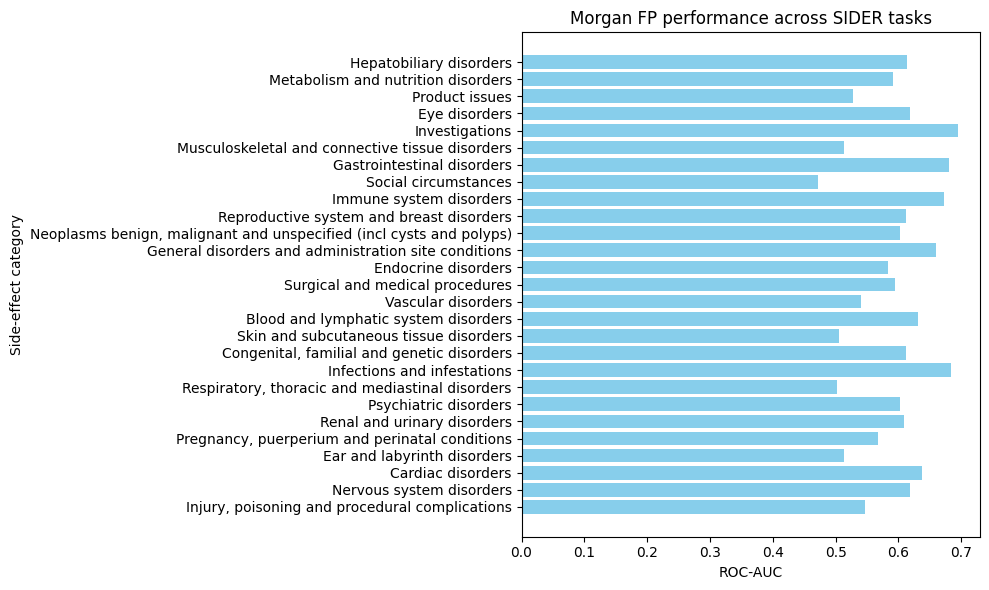

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(df_results_per_task_morgan["Task"], df_results_per_task_morgan["ROC-AUC"], color="skyblue")
plt.xlabel("ROC-AUC")
plt.ylabel("Side-effect category")
plt.title("Morgan FP performance across SIDER tasks")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Next featurizer in the MLP Model: **RDKit Descriptors**

Note: The train features were already created before.

In [41]:
#Generate RDKit Descriptors
# Initialize MLP model (using a simple, effective architecture)
mlp_desc = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    max_iter=500,
    random_state=42,
    early_stopping=True,
    n_iter_no_change=20
)


# Use the existing featurizer to generate test features from test_dataset.ids
X_te_desc = rdkit_desc_featurizer.featurize(test_dataset.ids.tolist())

# Handle NaN values in the test set: replace with 0
X_te_desc[np.isnan(X_te_desc)] = 0

# Convert the training features DataFrame back to a NumPy array for seamless scaling
X_tr_desc = df_desc_sider_train.values

print(f"Training Features (X) shape: {X_tr.shape}")
print(f"RDKit Descriptor Test Features (X) shape: {X_te_desc.shape}")


# Feature Scaling: CRUCIAL for Neural Networks
# Initialize and fit the scaler ONLY on the training data (X_tr_desc)
X_tr_scaled_desc = scaler.fit_transform(X_tr_desc)

# Apply the fitted scaler to the test data
X_te_scaled_desc = scaler.transform(X_te_desc)

print("Scaling complete.")

Training Features (X) shape: (1141, 2048)
RDKit Descriptor Test Features (X) shape: (143, 217)
Scaling complete.


In [42]:
# Training and Evaluation of MLP Classifier with RDKit Descriptors

# Train the model
mlp_desc.fit(X_tr_scaled_desc, Y_tr)

# Predict probabilities (for ROC-AUC)
Y_pred_proba_mlp_desc = mlp_desc.predict_proba(X_te_scaled_desc)
# Predict Binary Labels (0 or 1) using the trained model (for F1-score and Accuracy)
Y_pred_binary_desc = mlp_desc.predict(X_te_scaled_desc)

results_per_task_desc = []
num_tasks = Y_te.shape[1]

# Evaluate performance (Multi-task ROC AUC)
roc_auc_mlp_desc = roc_auc_score(Y_te, Y_pred_proba_mlp_desc, average='weighted')

# We save the results
results_sider.append({
     'Model': 'MLP Neural Network',
     'Featurizer': 'RDKit Descriptors',
     'ROC AUC (Weighted)': roc_auc_mlp_desc})

print(f"MLP (RDKit Descriptors) Results: ROC AUC (Weighted) = {roc_auc_mlp_desc:.4f}")

# Convert Y_te to a DataFrame for easy column slicing
Y_te_df = pd.DataFrame(Y_te, columns=tasks)

# Iterate through each of the 27 SIDER tasks
for i, task in enumerate(tasks):
    # Select the i-th column for true labels, probabilities, and binary predictions
    y_true_task = Y_te_df.iloc[:, i]
    y_proba_task = Y_pred_proba_mlp_desc[:, i]
    y_binary_task = Y_pred_binary_desc[:, i]

    # Calculate metrics
    roc_auc = roc_auc_score(y_true_task, y_proba_task)
    f1 = f1_score(y_true_task, y_binary_task, average='binary', zero_division=0)
    acc = accuracy_score(y_true_task, y_binary_task)

    results_per_task_desc.append({
        "Task": task,
        "ROC-AUC": roc_auc,
        "F1-score": f1,
        "Accuracy": acc
    })

# --- Display the final results table ---
df_results_per_task_desc = pd.DataFrame(results_per_task_desc)

# Sort the table by ROC-AUC (highest score first)
df_results_per_task_desc_sorted = df_results_per_task_desc.sort_values(
    by='ROC-AUC',
    ascending=False
)

print("SIDER Metrics Per Task (MLP + RDKit Descriptors)")
df_results_per_task_desc_sorted.reset_index(drop=True, inplace=True)
df_results_per_task_desc_sorted

MLP (RDKit Descriptors) Results: ROC AUC (Weighted) = 0.5512
SIDER Metrics Per Task (MLP + RDKit Descriptors)


,Task,ROC-AUC,F1-score,Accuracy
0,Reproductive system and breast disorders,0.658580,0.681818,0.608392
1,Nervous system disorders,0.654229,0.967509,0.937063
2,"Neoplasms benign, malignant and unspecified (i...",0.639546,0.230769,0.720280
3,"Injury, poisoning and procedural complications",0.637379,0.847737,0.741259
4,Musculoskeletal and connective tissue disorders,0.630028,0.865079,0.762238
5,"Pregnancy, puerperium and perinatal conditions",0.619748,0.000000,0.951049
6,Endocrine disorders,0.593113,0.105263,0.762238
7,Infections and infestations,0.584158,0.829876,0.713287
8,Eye disorders,0.573875,0.718447,0.594406
9,Renal and urinary disorders,0.571429,0.745283,0.622378


For extra visualization we can add a plot that shows the ROC-AUC of each task.

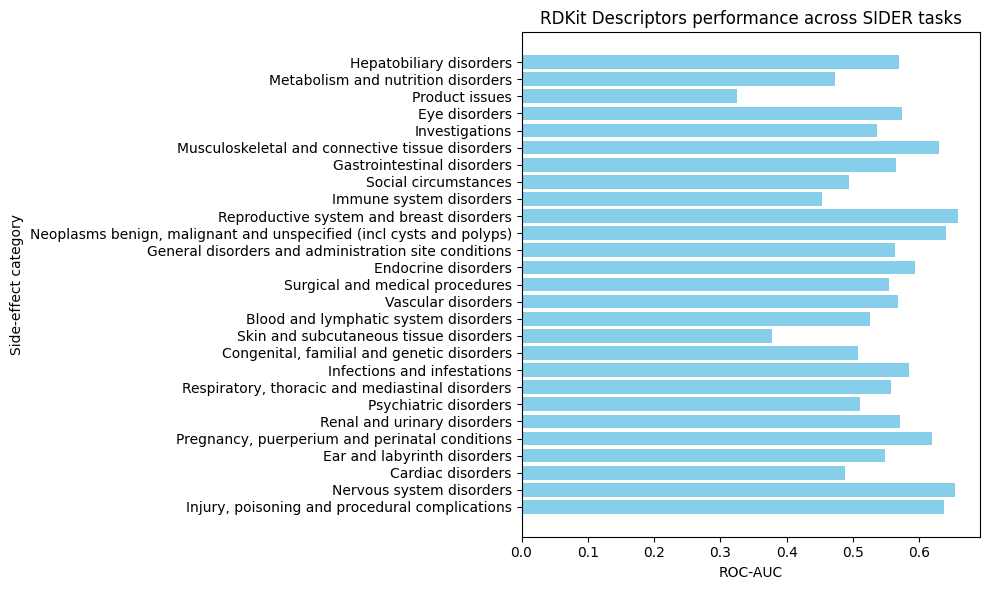

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(df_results_per_task_desc["Task"], df_results_per_task_desc["ROC-AUC"], color="skyblue")
plt.xlabel("ROC-AUC")
plt.ylabel("Side-effect category")
plt.title("RDKit Descriptors performance across SIDER tasks")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Next featurizer in the MLP Model: **MACCS Keys**

Note: The train features were already created before.

In [44]:
# Generate MACCS Keys
# Initialize MLP model (using a simple, effective architecture)
mlp_maccs = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    max_iter=500,
    random_state=42,
    early_stopping=True,
    n_iter_no_change=20)

# MACCS Keys for the TEST set from test_dataset.ids
X_te_maccs = maccs_featurizer.featurize(test_dataset.ids.tolist())

# We must ensure X_tr_maccs is defined here for the scaler.
X_tr_maccs = maccs_featurizer.featurize(train_dataset.ids.tolist())

print(f"Training Features (X) shape: {X_tr.shape}")
print(f"MACCS Keys Test Features (X) shape: {X_te_desc.shape}")

# Feature Scaling
# Initialize and fit the scaler ONLY on the training data (X_tr_maccs)
X_tr_scaled_maccs = scaler.fit_transform(X_tr_maccs)

# Apply the fitted scaler to the test data
X_te_scaled_maccs = scaler.transform(X_te_maccs)

print("Scaling complete.")

[19:47:05] WARNING: not removing hydrogen atom without neighbors
[19:47:05] WARNING: not removing hydrogen atom without neighbors
[19:47:05] WARNING: not removing hydrogen atom without neighbors
[19:47:05] WARNING: not removing hydrogen atom without neighbors
[19:47:05] WARNING: not removing hydrogen atom without neighbors
[19:47:05] WARNING: not removing hydrogen atom without neighbors
[19:47:05] WARNING: not removing hydrogen atom without neighbors
[19:47:05] WARNING: not removing hydrogen atom without neighbors
[19:47:05] WARNING: not removing hydrogen atom without neighbors
[19:47:05] WARNING: not removing hydrogen atom without neighbors
[19:47:06] WARNING: not removing hydrogen atom without neighbors
[19:47:06] WARNING: not removing hydrogen atom without neighbors
[19:47:06] WARNING: not removing hydrogen atom without neighbors


Training Features (X) shape: (1141, 2048)
MACCS Keys Test Features (X) shape: (143, 217)
Scaling complete.


In [45]:
# Training and Evaluation of MLP Classifier ---

# Train the model
mlp_maccs.fit(X_tr_scaled_maccs, Y_tr)

# Predict probabilities
Y_pred_proba_mlp_maccs = mlp_maccs.predict_proba(X_te_scaled_maccs)
# Predict Binary Labels (0 or 1) using the trained model (F1-score and Accuracy)
Y_pred_binary = mlp_maccs.predict(X_te_scaled_maccs)

results_per_task_maccs = []
num_tasks = Y_te.shape[1]

# Evaluate performance (Multi-task ROC AUC)
roc_auc_mlp_maccs = roc_auc_score(Y_te, Y_pred_proba_mlp_maccs, average='weighted')

# Store results
results_sider.append({
     'Model': 'MLP Neural Network',
     'Featurizer': 'MACCS Keys',
     'ROC AUC (Weighted)': roc_auc_mlp_maccs })


print(f"MLP (MACCS Keys) Results: ROC AUC (Weighted) = {roc_auc_mlp_maccs:.4f}")


# Convert Y_te to a DataFrame
Y_te_df = pd.DataFrame(Y_te, columns=tasks)

# Iterate through each of the 27 SIDER tasks
for i, task in enumerate(tasks):
    # Select the i-th column for true labels, probabilities, and binary predictions
    y_true_task = Y_te_df.iloc[:, i]
    y_proba_task = Y_pred_proba_mlp_maccs[:, i]
    y_binary_task = Y_pred_binary[:, i]

    roc_auc = roc_auc_score(y_true_task, y_proba_task)

    # zero_division=0 handles cases where there are no positive samples
    f1 = f1_score(y_true_task, y_binary_task, average='binary', zero_division=0)

    acc = accuracy_score(y_true_task, y_binary_task)

    results_per_task_maccs.append({
        "Task": task,
        "ROC-AUC": roc_auc,
        "F1-score": f1,
        "Accuracy": acc
    })

# Display the final results table
df_results_per_task_maccs = pd.DataFrame(results_per_task_maccs)

# Sort the table by ROC-AUC (highest score first)
df_results_per_task_maccs_sorted = df_results_per_task_maccs.sort_values(
    by='ROC-AUC',
    ascending=False
)

print("SIDER Metrics Per Task (MLP + MACCS Keys)")
df_results_per_task_maccs_sorted.reset_index(drop=True, inplace=True)
df_results_per_task_maccs_sorted

MLP (MACCS Keys) Results: ROC AUC (Weighted) = 0.6275
SIDER Metrics Per Task (MLP + MACCS Keys)


,Task,ROC-AUC,F1-score,Accuracy
0,Nervous system disorders,0.748756,0.967509,0.937063
1,Investigations,0.739333,0.937984,0.888112
2,Blood and lymphatic system disorders,0.700602,0.755319,0.678322
3,Gastrointestinal disorders,0.696970,0.960000,0.923077
4,Endocrine disorders,0.696694,0.146341,0.755245
5,Cardiac disorders,0.688246,0.807339,0.706294
6,Reproductive system and breast disorders,0.682939,0.646707,0.587413
7,Psychiatric disorders,0.646939,0.838428,0.741259
8,Renal and urinary disorders,0.634282,0.720812,0.615385
9,Eye disorders,0.634209,0.715909,0.650350


For extra visualization we can add a plot that shows the ROC-AUC of each task.

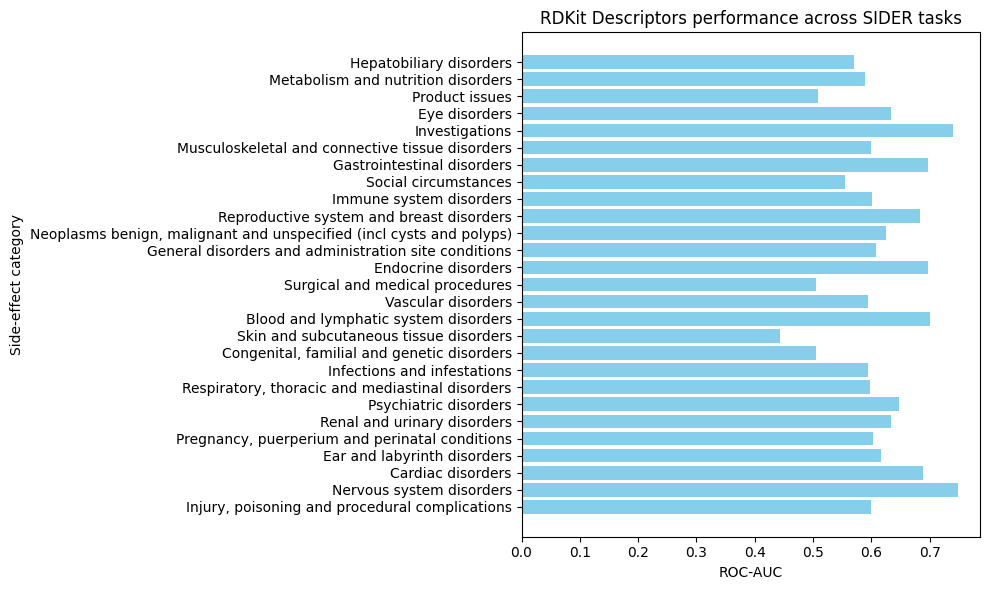

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(df_results_per_task_maccs["Task"], df_results_per_task_maccs["ROC-AUC"], color="skyblue")
plt.xlabel("ROC-AUC")
plt.ylabel("Side-effect category")
plt.title("RDKit Descriptors performance across SIDER tasks")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

To finalize the training and to chose the best model, we display the table with all the evaluation results of the 3 different featurized MLP model.

In [47]:
# Convert the results list into a readable Pandas DataFrame to display
df_results_sider = pd.DataFrame(results_sider)

# Sort by 'ROC AUC (Weighted)' in descending order (highest score first)
df_results_sider = df_results_sider.sort_values(
    by='ROC AUC (Weighted)',
    ascending=False  # True for ascending, False for descending (best score first)
)

print("SIDER Classification Results")
df_results_sider



SIDER Classification Results


,Model,Featurizer,ROC AUC (Weighted)
2,MLP Neural Network,MACCS Keys,0.627504
0,MLP Neural Network,Morgan FP,0.602480
1,MLP Neural Network,RDKit Descriptors,0.551210
